In [ ]:
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from keras.models import Sequential
from keras.datasets import mnist

In [ ]:
(train_x,test_x),(train_y, test_y) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
train_x.shape,test_x.shape, train_y.shape, test_y.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
train_x[0][0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=uint8)

In [ ]:
test_x[0]

5

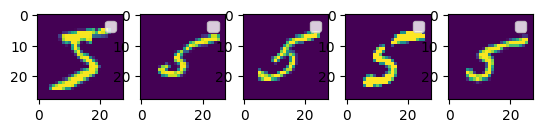

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
for i in range(0,5):
  ind = np.where(test_x==5)
  ax = plt.subplot(1,5,i+1)
  ax.imshow(train_x[ind][i],label = test_x[ind])
  plt.legend();

In [ ]:
train_x, train_y = train_x.reshape(-1, 28, 28,1), train_y.reshape(-1, 28, 28,1)
train_x.shape, train_y.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [ ]:
from keras.utils import to_categorical
test_x, test_y = to_categorical(test_x), to_categorical(test_y)
test_x.shape, test_y.shape

((60000, 10), (10000, 10))

In [ ]:
from keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation = 'relu', input_shape = (28,28,1)))
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation= "relu"))
model.add(Dense(10, activation= "softmax"))
model.compile(optimizer= SGD(0.01), loss = "categorical_crossentropy", metrics = "accuracy")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

In [ ]:
model.fit(train_x,test_x, epochs = 10, batch_size =32, validation_data=(train_y,test_y))

Epoch 1/10
1875/1875 [==============================] - 148s 78ms/step - loss: 0.5893 - accuracy: 0.8205 - val_loss: 0.1440 - val_accuracy: 0.9526
Epoch 2/10
1875/1875 [==============================] - 138s 74ms/step - loss: 0.1573 - accuracy: 0.9504 - val_loss: 0.0911 - val_accuracy: 0.9695
Epoch 3/10
1875/1875 [==============================] - 136s 72ms/step - loss: 0.1063 - accuracy: 0.9656 - val_loss: 0.0719 - val_accuracy: 0.9769
Epoch 4/10
1875/1875 [==============================] - 138s 73ms/step - loss: 0.0843 - accuracy: 0.9734 - val_loss: 0.0734 - val_accuracy: 0.9761
Epoch 5/10
1875/1875 [==============================] - 144s 77ms/step - loss: 0.0697 - accuracy: 0.9779 - val_loss: 0.0475 - val_accuracy: 0.9830
Epoch 6/10
1875/1875 [==============================] - 140s 75ms/step - loss: 0.0594 - accuracy: 0.9805 - val_loss: 0.0498 - val_accuracy: 0.9832
Epoch 7/10
1875/1875 [==============================] - 141s 75ms/step - loss: 0.0494 - accuracy: 0.9838 - val_loss: 0